# Global params

In [1]:
img_directory = '/home/ec2-user/autoencoder-vaegan/colbert'
batch_size = 8
training_set_size = 3264
img_size = 128

# Imports and helper functions

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os
from utils import load_img, resize_crop
%matplotlib inline

def imshow(imgs):
    fig = plt.figure()
    nimgs = len(imgs)
    for i in range(nimgs):
        a=fig.add_subplot(1,nimgs,i+1)
        plt.imshow(imgs[i])
        plt.axis('off')

# Load training data

In [3]:
training = np.array([resize_crop(load_img(i+1, img_directory), (img_size, img_size)) for i in range(training_set_size)])

/home/ec2-user/.conda/envs/keras/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


# Create model and load weights

Instantiate model

In [4]:
from discriminator import Discriminator

model = Discriminator(img_shape=(img_size, img_size, 3), batch_size=batch_size)
model.build_model()

Using TensorFlow backend.


In [11]:
y = model.model.predict(training[:batch_size], batch_size=batch_size)
y[0].shape

(8, 5, 5, 1)

# Train

Reset image save filename counter

In [15]:
save_idx = 0

Define some useful Keras callbacks

In [22]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=3, min_lr=0.000000000001)    

In [ ]:
# save an image of prediction before training
# predictions = model.model.predict(training[:batch_size], batch_size=batch_size)
# path = os.path.join(img_save_directory, '%04d.jpg' % save_idx)
# sp.misc.imsave(path, predictions[0])
# save_idx += 1

start = save_idx
stop = save_idx + 1000

for i in range(start, stop):
    model.model.fit(x=training, y=training, epochs=1, batch_size=batch_size, verbose=True, callbacks=[reduce_lr])
    predictions = model.model.predict(training[:batch_size], batch_size=batch_size)
    path = os.path.join(img_save_directory, '%04d.jpg' % i)
    sp.misc.imsave(path, predictions[0])
    model.model.save_weights(model_weights_path)
    save_idx = i

Epoch 1/1
3264/3264 [==============================] - 23s - loss: 2.2449    
Epoch 1/1
3264/3264 [==============================] - 23s - loss: 2.1951    
Epoch 1/1
3264/3264 [==============================] - 23s - loss: 2.1419    
Epoch 1/1
3264/3264 [==============================] - 23s - loss: 2.1199    
Epoch 1/1
3264/3264 [==============================] - 23s - loss: 2.2771    
Epoch 1/1
3264/3264 [==============================] - 23s - loss: 2.3218    
Epoch 1/1
3264/3264 [==============================] - 23s - loss: 2.1935    
Epoch 1/1
3264/3264 [==============================] - 23s - loss: 2.4709    
Epoch 1/1
3264/3264 [==============================] - 23s - loss: 2.0550    
Epoch 1/1
3264/3264 [==============================] - 23s - loss: 2.1861    
Epoch 1/1
3264/3264 [==============================] - 23s - loss: 2.1341    
Epoch 1/1
3264/3264 [==============================] - 23s - loss: 2.1063    
Epoch 1/1
3264/3264 [==============================] - 23s - los

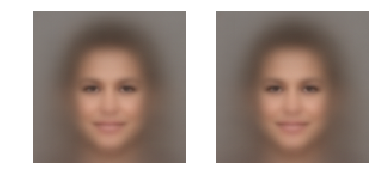

In [57]:
predictions = model.model.predict(training[:batch_size], batch_size=batch_size)
imshow([predictions[0], predictions[7]])